In [59]:
from ctypes import sizeof
from tabnanny import verbose
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.operators import PolynomialTensor
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from pyscf.lo import Boys
from pyscf.lo import PM
from qiskit_nature.units import DistanceUnit
import numpy as np  
from pyscf.tools import molden

In [3]:
def h4_linear_chain_loc(dist=0.74):
    # Run HF with orbital localization
    driver = PySCFDriver(
        atom= 'H 0.0 0.0 0.0; H 0.0 0.0 0.74; H 0.0 3.00 0.00; H 0.0  3.00 0.74',
        basis="sto3g",
        unit=DistanceUnit.ANGSTROM
    )
    problem = driver.run()
    mol = driver._mol
    mf = driver._calc
    mo = mf.mo_coeff
    hamiltonian = problem.hamiltonian
    nuclear_repulsion = problem.nuclear_repulsion_energy
    hamiltonian.electronic_integrals.alpha += PolynomialTensor({"": nuclear_repulsion})
    hamiltonian.nuclear_repulsion_energy = None
    
    # Jordan-Wigner mapping (8 qubits: 4 occupied + 4 virtual)
    mapper = JordanWignerMapper()
    qubit_op = mapper.map(hamiltonian.second_q_op())
    
    return qubit_op
h4_linear_op_stretched=h4_linear_chain_loc(0.75)
eigenvalues, eigenvectors = np.linalg.eig(h4_linear_op_stretched.to_matrix())
print(np.min(eigenvalues))


(-2.2742278824072875+0j)


In [4]:
print(np.sort(eigenvalues))

[-2.27422788+0.j -1.68341983+0.j -1.68341983+0.j -1.66851294+0.j
 -1.66851294+0.j -1.66842307+0.j -1.66842307+0.j -1.66842307+0.j
 -1.6678287 +0.j -1.6678287 +0.j -1.6678287 +0.j -1.59176133+0.j
 -1.59176133+0.j -1.57167163+0.j -1.57167163+0.j -1.31418947+0.j
 -1.29834994+0.j -1.15572232+0.j -1.15572232+0.j -1.15572232+0.j
 -1.15560221+0.j -1.15500761+0.j -1.15500761+0.j -1.15500761+0.j
 -1.15383044+0.j -1.07542257+0.j -1.07542257+0.j -1.07542257+0.j
 -1.07542257+0.j -1.07189631+0.j -1.07189631+0.j -1.06380177+0.j
 -1.06380177+0.j -1.0617274 +0.j -1.06155379+0.j -1.06155379+0.j
 -1.06155379+0.j -1.06120758+0.j -1.06120758+0.j -1.06120758+0.j
 -1.06120758+0.j -1.06120758+0.j -1.05924372+0.j -1.05924372+0.j
 -1.05924372+0.j -1.05924372+0.j -0.98850831+0.j -0.98850831+0.j
 -0.98850831+0.j -0.98850831+0.j -0.98405589+0.j -0.98405589+0.j
 -0.97286228+0.j -0.97286228+0.j -0.96613809+0.j -0.96613809+0.j
 -0.96613809+0.j -0.96613809+0.j -0.9034754 +0.j -0.90331964+0.j
 -0.90331964+0.j -0.90331

In [5]:
driver = PySCFDriver(
        atom= 'H 0.0 0.0 0.0; H 0.0 0.0 0.74; H 0.0 3.00 0.00; H 0.0  3.00 0.74',
        basis="sto3g",
        unit=DistanceUnit.ANGSTROM
    )
problem = driver.run()
mol = driver._mol
mf = driver._calc
mo = mf.mo_coeff
hamiltonian = problem.hamiltonian
nuclear_repulsion = problem.nuclear_repulsion_energy
hamiltonian.electronic_integrals.alpha += PolynomialTensor({"": nuclear_repulsion})
hamiltonian.nuclear_repulsion_energy = None
    
# Jordan-Wigner mapping (8 qubits: 4 occupied + 4 virtual)
mapper = JordanWignerMapper()
qubit_op = mapper.map(hamiltonian.second_q_op())
tapered_mapper = problem.get_tapered_mapper(mapper)
qubit_op = tapered_mapper.map(hamiltonian.second_q_op())

In [6]:
print(qubit_op)

SparsePauliOp(['IIII', 'IZZZ', 'ZIZZ', 'ZZII', 'ZZIZ', 'ZIZI', 'IIIZ', 'IZZI', 'ZZZI', 'ZIIZ', 'IIZI', 'IZIZ', 'IZII', 'IIZZ', 'ZIII', 'ZZZZ', 'IIIX', 'ZZIX', 'IZZX', 'IIXI', 'ZZXI', 'XXII', 'YYII', 'ZXIZ', 'IXZZ', 'YZYZ', 'XZXZ', 'XIIX', 'XZZX', 'IYYX', 'IXXX', 'XZZI', 'XIII', 'IXXI', 'IYYI', 'ZYZY', 'IYIY', 'YIXY', 'XIYY', 'IIXX', 'ZZXX', 'XXIX', 'YYIX', 'XXXI', 'YYXI', 'XYYI'],
              coeffs=[-0.19357717+0.j,  0.17635726+0.j,  0.16789502+0.j,  0.17232899+0.j,
 -0.21800731+0.j,  0.32513381+0.j, -0.227612  +0.j,  0.32963359+0.j,
  0.17635726+0.j,  0.42938676+0.j,  0.16789502+0.j,  0.42929655+0.j,
 -0.21800731+0.j,  0.41805186+0.j, -0.227612  +0.j,  0.41799163+0.j,
  0.07871918+0.j, -0.07645459+0.j, -0.00226459+0.j,  0.12508566+0.j,
 -0.12508566+0.j,  0.12289671+0.j,  0.12289671+0.j,  0.04572082+0.j,
 -0.04572082+0.j, -0.04644212+0.j, -0.04644212+0.j,  0.04383758+0.j,
 -0.04383758+0.j, -0.04417753+0.j, -0.04417753+0.j,  0.04417753+0.j,
 -0.04417753+0.j,  0.04452046+0.j,  0.04452

In [7]:
print(np.sort(np.linalg.eig(qubit_op.to_matrix())[0]))

[-2.27422788+0.j -1.0617274 +0.j -1.06120758+0.j -1.06120758+0.j
 -1.06120758+0.j -0.69868799+0.j -0.6555    +0.j -0.38092707+0.j
 -0.38030815+0.j -0.35403549+0.j -0.35165201+0.j -0.33077188+0.j
  0.95021095+0.j  0.96752291+0.j  2.12551198+0.j  2.53098008+0.j]


In [8]:
dist= 0.74
atom = f"H 0.0 0.0 0.0; H 0.74 0.0 0.0; H 0.74 {dist} 0.0; H 0.0 {dist} 0.0" 
driver = PySCFDriver(
        atom=atom,
        basis="sto3g",
        unit=DistanceUnit.ANGSTROM
    )   
problem = driver.run()
mol = driver._mol
mf = driver._calc
mo = mf.mo_coeff
hamiltonian = problem.hamiltonian
nuclear_repulsion = problem.nuclear_repulsion_energy
hamiltonian.electronic_integrals.alpha += PolynomialTensor({"": nuclear_repulsion})
hamiltonian.nuclear_repulsion_energy = None
# Jordan-Wigner mapping (8 qubits: 4 occupied + 4 virtual)
mapper = JordanWignerMapper()
qubit_op = mapper.map(hamiltonian.second_q_op())
tapered_mapper = problem.get_tapered_mapper(mapper)
qubit_op = tapered_mapper.map(hamiltonian.second_q_op())
print(qubit_op)
print(np.sort(np.linalg.eig(qubit_op.to_matrix())[0]))
print(np.min(np.linalg.eig(qubit_op.to_matrix())[0]))

SparsePauliOp(['IIIII', 'IZZZI', 'IZZIZ', 'IIIZZ', 'IIIIZ', 'IZZZZ', 'IIIZI', 'IZZII', 'ZZZII', 'ZIIZI', 'IIZII', 'IZIZI', 'IZIII', 'IIZZI', 'ZIIII', 'ZZZZI', 'IIIXI', 'IZZXZ', 'IZZXI', 'IIIXZ', 'IIIXX', 'IZZXX', 'ZZXZZ', 'IIXZZ', 'ZZXII', 'IIXII', 'YZYZZ', 'XZXZZ', 'YZYII', 'XZXII', 'YYIZZ', 'XXIZZ', 'YYIII', 'XXIII', 'ZXIZX', 'IXZZX', 'ZYZIY', 'IYIIY', 'YZYZX', 'XZXZX', 'YIXIY', 'XIYIY', 'YYIZX', 'XXIZX', 'YXZIY', 'XYZIY', 'XIIXI', 'XZZXI', 'IIZXI', 'IZIXI', 'IYYXI', 'IXXXI', 'ZIIIZ', 'XIIII', 'XZZIZ', 'XZZII', 'XIIIZ', 'IZIIZ', 'IXXIZ', 'IYYIZ', 'IIZIZ', 'ZZZIZ', 'XZZIX', 'XIIIX', 'IZIIX', 'IIZIX', 'IXXIX', 'IYYIX', 'ZIYYI', 'IZYYI', 'ZZXXZ', 'IIXXZ', 'ZYZYI', 'IYIYI', 'ZXIXZ', 'IXZXZ', 'YIXYI', 'XIYYI', 'YZYXZ', 'XZXXZ', 'ZZXYY', 'IIXYY', 'ZZXXX', 'IIXXX', 'ZXIYY', 'IXZYY', 'ZXIXX', 'IXZXX', 'YYIYY', 'XXIYY', 'YYIXX', 'XXIXX', 'ZZIII', 'ZIZII', 'XIZII', 'XZIII', 'XXXII', 'XYYII'],
              coeffs=[ 7.23487676e-01+0.j,  3.22161386e-01+0.j, -4.09202574e-02+0.j,
  2.24106830e-01+

In [11]:
for dist in np.arange(0.7, 2.5 + 0.01, 0.02):
    atom_string = f"H 0.0 0.0 0.0; H 0.0 0.0 0.74; H 0.0 {dist:.2f} 0.00; H 0.0 {dist:.2f} 0.74"
    driver = PySCFDriver(
        atom=atom_string,
        basis="sto3g",
        unit=DistanceUnit.ANGSTROM
    )
    problem = driver.run()
    mol = driver._mol
    mf = driver._calc
    mo = mf.mo_coeff
    hamiltonian = problem.hamiltonian
    nuclear_repulsion = problem.nuclear_repulsion_energy
    hamiltonian.electronic_integrals.alpha += PolynomialTensor({"": nuclear_repulsion})
    hamiltonian.nuclear_repulsion_energy = None
    
    # Jordan-Wigner mapping (8 qubits: 4 occupied + 4 virtual)
    mapper = JordanWignerMapper()
    qubit_op = mapper.map(hamiltonian.second_q_op())
    # Get the tapered mapper
    tapered_mapper = problem.get_tapered_mapper(mapper)
    qubit_op = tapered_mapper.map(hamiltonian.second_q_op())
    eigenvalues, eigenvectors = np.linalg.eig(qubit_op.to_matrix())
    print(f"Distance: {dist}, Min Eigenvalue: {np.min(eigenvalues)}, Sorted Eigenvalues: {np.sort(eigenvalues)}")


Distance: 0.7, Min Eigenvalue: (-1.5923498862846157+0j), Sorted Eigenvalues: [-1.59234989+0.j -1.42168793+0.j -0.1244312 +0.j -0.1244312 +0.j
 -0.1244312 +0.j -0.03338613+0.j  0.2927489 +0.j  0.30894291+0.j
  0.44690124+0.j  0.44836282+0.j  0.70908165+0.j  0.93044572+0.j
  2.17399312+0.j  2.31233341+0.j  3.981145  +0.j  5.33395551+0.j]
Distance: 0.72, Min Eigenvalue: (-1.6037646799479863+0j), Sorted Eigenvalues: [-1.60376468+0.j -1.45809834+0.j -0.18413839+0.j -0.18413839+0.j
 -0.18413839+0.j -0.08467336+0.j  0.23492153+0.j  0.2481681 +0.j
  0.3870054 +0.j  0.38915475+0.j  0.64843415+0.j  0.86174394+0.j
  2.08850077+0.j  2.20693722+0.j  3.92521302+0.j  5.22283459+0.j]
Distance: 0.74, Min Eigenvalue: (-1.627992568915426+0j), Sorted Eigenvalues: [-1.62799257+0.j -1.62109773+0.j -1.48380791+0.j -1.47163272+0.j
 -0.23982509+0.j -0.23982509+0.j -0.23982509+0.j -0.13261688+0.j
  0.08379165+0.j  0.18045758+0.j  0.19212354+0.j  0.21557606+0.j
  0.22736495+0.j  0.33118784+0.j  0.33389326+0.j  0

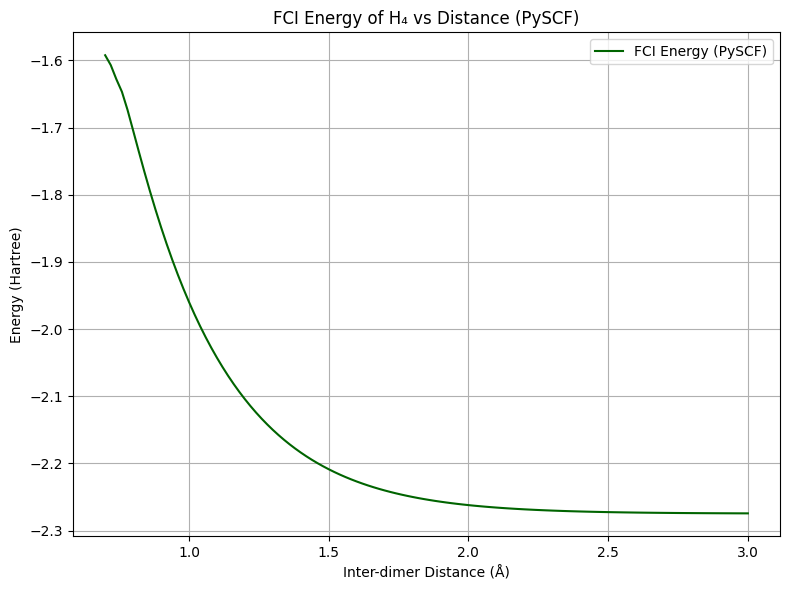

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, fci

# Store distances and FCI energies
distances = []
fci_energies = []

# Scan inter-dimer distances from 0.7 Å to 3.0 Å
for dist in np.arange(0.7, 3.0 + 0.01, 0.02):
    # H2 dimer stacked along y-axis, each H-H = 0.74 Å
    atom = f'''
        H 0.0 0.0 0.0
        H 0.0 0.0 0.74
        H 0.0 {dist:.2f} 0.00
        H 0.0 {dist:.2f} 0.74
    '''
    
    # Define molecule
    mol = gto.M(
        atom=atom,
        basis='sto-3g',
        unit='Angstrom',
        verbose=0,
        spin=0,
        charge=0
    )

    # RHF calculation
    mf = scf.RHF(mol)
    mf.kernel()

    # FCI calculation
    cisolver = fci.FCI(mol, mf.mo_coeff)
    energy, _ = cisolver.kernel()

    # Store results
    distances.append(dist)
    fci_energies.append(energy)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(distances, fci_energies, label='FCI Energy (PySCF)', color='darkgreen')
plt.xlabel("Inter-dimer Distance (Å)")
plt.ylabel("Energy (Hartree)")
plt.title("FCI Energy of H₄ vs Distance (PySCF)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



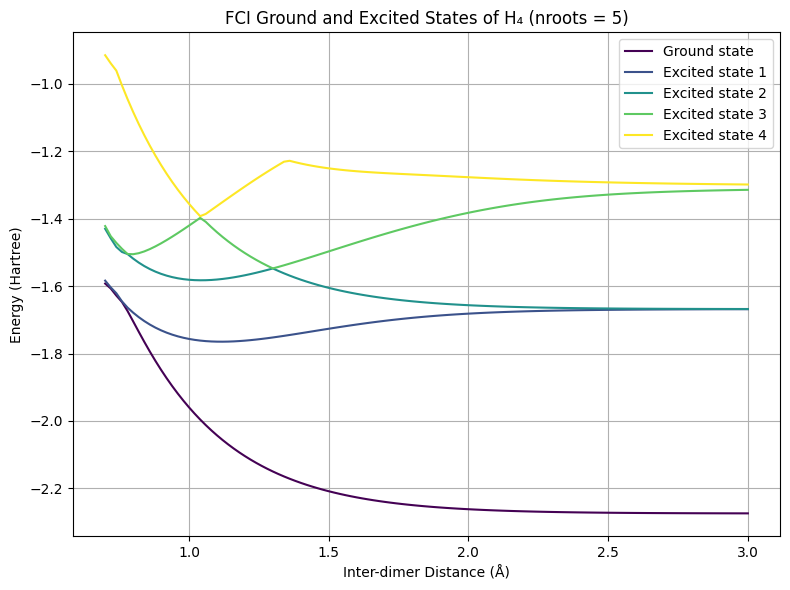

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, fci

# Configuration
nroots = 5  # Number of FCI states to compute per geometry
distances = []
fci_states = [[] for _ in range(nroots)]

# Distance scan
for dist in np.arange(0.7, 3.0 + 0.01, 0.02):
    atom = f'''
        H 0.0 0.0 0.0
        H 0.0 0.0 0.74
        H 0.0 {dist:.2f} 0.00
        H 0.0 {dist:.2f} 0.74
    '''

    mol = gto.M(
        atom=atom,
        basis='sto-3g',
        unit='Angstrom',
        spin=0,  # singlet
        charge=0,
        verbose=0
    )

    mf = scf.RHF(mol)
    mf.kernel()

    # FCI solver with multiple roots
    cisolver = fci.FCI(mol, mf.mo_coeff)
    energies, _ = cisolver.kernel(nroots=nroots)

    distances.append(dist)
    for i in range(nroots):
        fci_states[i].append(energies[i])

# Plot
plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, nroots))
for i in range(nroots):
    label = "Ground state" if i == 0 else f"Excited state {i}"
    plt.plot(distances, fci_states[i], label=label, color=colors[i])

plt.xlabel("Inter-dimer Distance (Å)")
plt.ylabel("Energy (Hartree)")
plt.title(f"FCI Ground and Excited States of H₄ (nroots = {nroots})")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor

# Storage
distances = []
eigenvalue_spectrum = []  # list of lists (each sublist is spectrum at one distance)

# Scan inter-dimer distances
for dist in np.arange(0.7, 3.0 + 0.01, 0.02):
    atom_string = f"H 0.0 0.0 0.0; H 0.0 0.0 0.74; H 0.0 {dist:.2f} 0.00; H 0.0 {dist:.2f} 0.74"
    
    # Run PySCF and extract molecule
    driver = PySCFDriver(atom=atom_string, basis="sto3g", unit=DistanceUnit.ANGSTROM)
    problem = driver.run()
    mol = driver._mol
    mf = driver._calc
    
    # Add nuclear repulsion to h1 tensor (manual step)
    hamiltonian = problem.hamiltonian
    nuclear_repulsion = problem.nuclear_repulsion_energy
    hamiltonian.electronic_integrals.alpha += PolynomialTensor({"": nuclear_repulsion})
    hamiltonian.nuclear_repulsion_energy = None

    # Jordan-Wigner mapping
    mapper = JordanWignerMapper()
    qubit_op = mapper.map(hamiltonian.second_q_op())
    # tapered_mapper = problem.get_tapered_mapper(mapper)
    # qubit_op = tapered_mapper.map(hamiltonian.second_q_op())

    # Diagonalize full qubit Hamiltonian matrix
    eigvals, _ = np.linalg.eigh(qubit_op.to_matrix())
    eigvals = np.real(np.sort(eigvals))

    # Store
    distances.append(dist)
    eigenvalue_spectrum.append(eigvals)
print(f"Distances: {distances}")
print(f"Eigenvalue Spectrum: {eigenvalue_spectrum}") 

Distances: [0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.8200000000000001, 0.8400000000000001, 0.8600000000000001, 0.8800000000000001, 0.9000000000000001, 0.9200000000000002, 0.9400000000000002, 0.9600000000000002, 0.9800000000000002, 1.0000000000000002, 1.0200000000000002, 1.0400000000000003, 1.0600000000000003, 1.0800000000000003, 1.1000000000000003, 1.1200000000000003, 1.1400000000000003, 1.1600000000000004, 1.1800000000000004, 1.2000000000000004, 1.2200000000000004, 1.2400000000000004, 1.2600000000000005, 1.2800000000000005, 1.3000000000000005, 1.3200000000000005, 1.3400000000000005, 1.3600000000000005, 1.3800000000000006, 1.4000000000000006, 1.4200000000000006, 1.4400000000000006, 1.4600000000000006, 1.4800000000000006, 1.5000000000000007, 1.5200000000000007, 1.5400000000000007, 1.5600000000000007, 1.5800000000000007, 1.6000000000000008, 1.6200000000000008, 1.6400000000000008, 1.6600000000000008, 1.6800000000000008, 1.7000000000000008, 1.7200000000000009, 1.7400000000000009, 1.760000000000

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

k = 10  # Number of eigenstates to plot (ground + 5 excited)
distances = np.arange(0.7, 3.0 + 0.01, 0.02)[:len(eigenvalue_spectrum)]  # match length

# Build a (len(distances) x k) array
energy_levels = np.full((len(distances), k), np.nan)  # fill with NaN for missing values

for i, eigvals in enumerate(eigenvalue_spectrum):
    n = min(k, len(eigvals))
    energy_levels[i, :n] = eigvals[:n]

# Plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, k))

for i in range(k):
    plt.plot(distances, energy_levels[:, i], label=f"State {i}", color=colors[i])

plt.xlabel("Inter-dimer Distance (Å)")
plt.ylabel("Energy (Hartree)")
plt.title("Eigenvalue Spectrum (Ground + Excited States) vs Distance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import ParityMapper
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor

# Storage
distances = []
eigenvalue_spectrum = []  # list of lists (each sublist is spectrum at one distance)

# Scan inter-dimer distances
for dist in np.arange(0.7, 2.5 + 0.01, 0.05):
    atom_string = f"H 0.0 0.0 0.0; H 0.0 0.0 0.74; H 0.0 {dist:.2f} 0.00; H 0.0 {dist:.2f} 0.74"
    
    # Run PySCF and extract molecule
    driver = PySCFDriver(atom=atom_string, basis="sto3g", unit=DistanceUnit.ANGSTROM)
    problem = driver.run()
    mol = driver._mol
    mf = driver._calc
    
    # Add nuclear repulsion to h1 tensor (manual step)
    hamiltonian = problem.hamiltonian
    nuclear_repulsion = problem.nuclear_repulsion_energy
    hamiltonian.electronic_integrals.alpha += PolynomialTensor({"": nuclear_repulsion})
    hamiltonian.nuclear_repulsion_energy = None

    # Jordan-Wigner mapping
    mapper = ParityMapper(num_particles=problem.num_particles)
    qubit_op = mapper.map(hamiltonian.second_q_op())
    np.save(f"qubit_op_H4_rec{dist:.2f}.npy", qubit_op.to_matrix())  
    # Diagonalize full qubit Hamiltonian matrix
    eigvals, _ = np.linalg.eigh(qubit_op.to_matrix())
    eigvals = np.real(np.sort(eigvals))

    # Store
    distances.append(dist)
    eigenvalue_spectrum.append(eigvals)
print(f"Distances: {distances}")
print(f"Eigenvalue Spectrum: {eigenvalue_spectrum}") 

Distances: [0.7, 0.75, 0.8, 0.8500000000000001, 0.9000000000000001, 0.9500000000000002, 1.0000000000000002, 1.0500000000000003, 1.1000000000000003, 1.1500000000000004, 1.2000000000000004, 1.2500000000000004, 1.3000000000000005, 1.3500000000000005, 1.4000000000000006, 1.4500000000000006, 1.5000000000000007, 1.5500000000000007, 1.6000000000000008, 1.6500000000000008, 1.7000000000000008, 1.7500000000000009, 1.800000000000001, 1.850000000000001, 1.900000000000001, 1.950000000000001, 2.000000000000001, 2.050000000000001, 2.1000000000000014, 2.1500000000000012, 2.200000000000001, 2.2500000000000013, 2.3000000000000016, 2.3500000000000014, 2.4000000000000012, 2.4500000000000015, 2.5000000000000018]
Eigenvalue Spectrum: [array([-1.59234989, -1.58359796, -1.42982362, -1.42168793, -0.91478495,
       -0.86423945, -0.62351326, -0.57361082, -0.48533365, -0.43977234,
       -0.24732913, -0.18710676, -0.1244312 , -0.1244312 , -0.1244312 ,
       -0.03338613,  0.03598194,  0.03598194,  0.09219758,  0

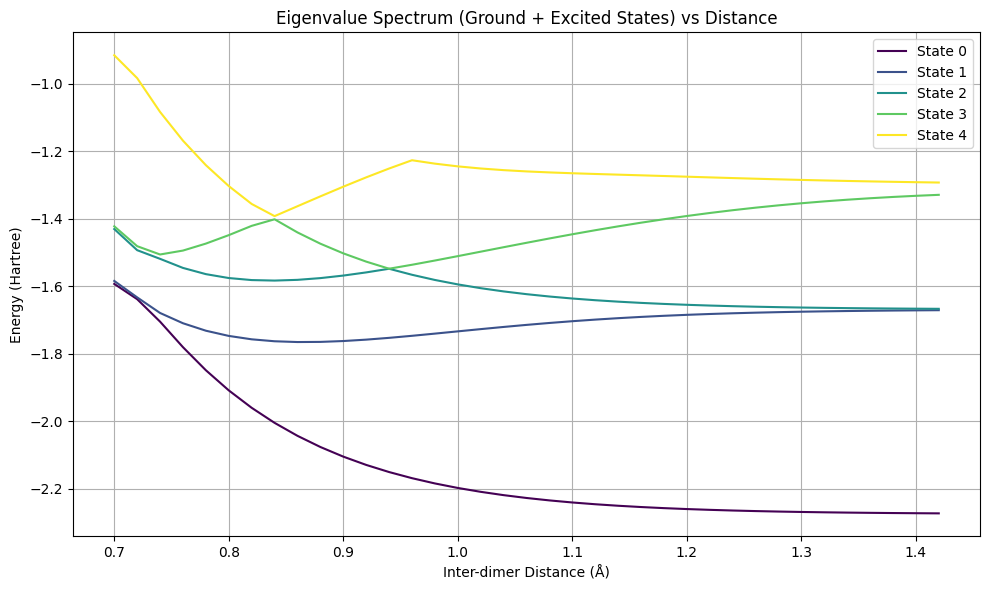

In [62]:
import numpy as np

k = 5  # Number of eigenstates to plot 
distances = np.arange(0.7, 2.5 + 0.01, 0.02)[:len(eigenvalue_spectrum)]  # match length

# Build a (len(distances) x k) array
energy_levels = np.full((len(distances), k), np.nan)  # fill with NaN for missing values

for i, eigvals in enumerate(eigenvalue_spectrum):
    n = min(k, len(eigvals))
    energy_levels[i, :n] = eigvals[:n]

# Plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, k))

for i in range(k):
    plt.plot(distances, energy_levels[:, i], label=f"State {i}", color=colors[i])

plt.xlabel("Inter-dimer Distance (Å)")
plt.ylabel("Energy (Hartree)")
plt.title("Eigenvalue Spectrum (Ground + Excited States) vs Distance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
qubit_op

SparsePauliOp(['IIIIII', 'IIIIIZ', 'IIIIZZ', 'IIIIZI', 'IIIZZI', 'IIIZZZ', 'IIIZII', 'IIIZIZ', 'IIZIII', 'IIZIIZ', 'IZZIII', 'IZZIIZ', 'ZZIIII', 'ZZIIIZ', 'ZIIIII', 'ZIIIIZ', 'IIIXIX', 'IIIXZX', 'IIIYIY', 'IZXIZX', 'IIXIZX', 'IZXIIX', 'IIXIIX', 'XZIIZX', 'XIIIZX', 'XZIIIX', 'XIIIIX', 'ZXXZXX', 'IYYZXX', 'ZXXIYY', 'IYYIYY', 'XXZZXX', 'YYIZXX', 'XXZIYY', 'YYIIYY', 'XXXXXX', 'YXYXXX', 'XXXYXY', 'YXYYXY', 'ZXZXXX', 'IXIXXX', 'ZXZYXY', 'IXIYXY', 'IIZIZZ', 'IZZIZZ', 'ZZIIZZ', 'ZIIIZZ', 'XXXZXZ', 'YXYZXZ', 'XXXIXI', 'YXYIXI', 'ZXZZXZ', 'IXIZXZ', 'ZXZIXI', 'IXIIXI', 'ZXXXXZ', 'IYYXXZ', 'ZXXYYI', 'IYYYYI', 'XXZXXZ', 'YYIXXZ', 'XXZYYI', 'YYIYYI', 'IIZZZI', 'IZZZZI', 'ZZIZZI', 'ZIIZZI', 'IZXXZI', 'IIXXZI', 'IZXXII', 'IIXXII', 'XZIXZI', 'XIIXZI', 'XZIXII', 'XIIXII', 'IIZZII', 'IZZZII', 'ZZIZII', 'ZIIZII', 'IZIIII', 'ZZZIII', 'ZIZIII', 'XIXIII', 'XZXIII', 'YIYIII'],
              coeffs=[-0.19094618+0.j,  0.18265987+0.j,  0.16200418+0.j,  0.10225536+0.j,
 -0.20999143+0.j,  0.16993712+0.j, -0.235487

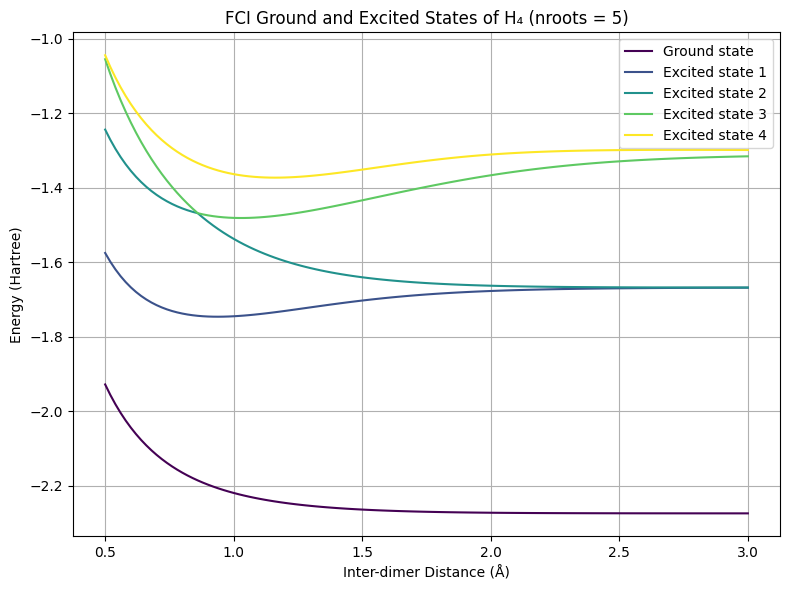

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, fci

# Configuration
nroots = 5  # Number of FCI states to compute per geometry
distances = []
fci_states = [[] for _ in range(nroots)]
"""
(0,0)      (0.74,0)
H----------H
-          -
-          -
-          -
dist     dist
-          -
-          -
-          -
H----------H
(0,dist)  (0.74,dist)
(0,0)     (0.74,0)     (0.74+dist,0)   (dist+0.74+0.74,0)
H----------H----dist-----------H---------H
"""
# Distance scan
for dist in np.arange(0.5, 3.0 + 0.01, 0.02):
    atom = f'''
        H 0.0 0.0 0.0
        H 0.74 0.0 0.0
        H {dist:.2f}+0.74 0.0 0.0
        H {dist:.2f}+1.48 0.0 0.0
    '''

    mol = gto.M(
        atom=atom,
        basis='sto-3g',
        unit='Angstrom',
        spin=0,  # singlet
        charge=0,
        verbose=0
    )

    mf = scf.RHF(mol)
    mf.kernel()

    # FCI solver with multiple roots
    cisolver = fci.FCI(mol, mf.mo_coeff)
    energies, _ = cisolver.kernel(nroots=nroots)

    distances.append(dist)
    for i in range(nroots):
        fci_states[i].append(energies[i])

# Plot
plt.figure(figsize=(8, 6))
colors = plt.cm.viridis(np.linspace(0, 1, nroots))
for i in range(nroots):
    label = "Ground state" if i == 0 else f"Excited state {i}"
    plt.plot(distances, fci_states[i], label=label, color=colors[i])

plt.xlabel("Inter-dimer Distance (Å)")
plt.ylabel("Energy (Hartree)")
plt.title(f"FCI Ground and Excited States of H₄ (nroots = {nroots})")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import ParityMapper
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor

# Storage
distances = []
eigenvalue_spectrum = []  # list of lists (each sublist is spectrum at one distance)

# Scan inter-dimer distances
for dist in np.arange(0.5, 3.0 + 0.01, 0.05):
    atom_string = f" H 0.0 0.0 0.0;H 0.74 0.0 0.0;H {dist:.2f}+0.74 0.0 0.0;H {dist:.2f}+1.48 0.0 0.0"
    # Run PySCF and extract molecule
    driver = PySCFDriver(atom=atom_string, basis="sto3g", unit=DistanceUnit.ANGSTROM)
    problem = driver.run()
    mol = driver._mol
    mf = driver._calc
    
    # Add nuclear repulsion to h1 tensor 
    hamiltonian = problem.hamiltonian
    nuclear_repulsion = problem.nuclear_repulsion_energy
    hamiltonian.electronic_integrals.alpha += PolynomialTensor({"": nuclear_repulsion})
    hamiltonian.nuclear_repulsion_energy = None

    # Parity mapping
    mapper = ParityMapper(num_particles=problem.num_particles)
    qubit_op = mapper.map(hamiltonian.second_q_op())
    np.save(f"qubit_op_H4_linear{dist:.2f}.npy", qubit_op.to_matrix())
    # Diagonalize full qubit Hamiltonian matrix
    eigvals, _ = np.linalg.eigh(qubit_op.to_matrix())
    eigvals = np.real(np.sort(eigvals))

    # Store
    distances.append(dist)
    eigenvalue_spectrum.append(eigvals)
print(f"Distances: {distances}")
print(f"Eigenvalue Spectrum: {eigenvalue_spectrum}") 

Distances: [0.5, 0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000002, 0.7500000000000002, 0.8000000000000003, 0.8500000000000003, 0.9000000000000004, 0.9500000000000004, 1.0000000000000004, 1.0500000000000005, 1.1000000000000005, 1.1500000000000006, 1.2000000000000006, 1.2500000000000007, 1.3000000000000007, 1.3500000000000008, 1.4000000000000008, 1.4500000000000008, 1.5000000000000009, 1.550000000000001, 1.600000000000001, 1.650000000000001, 1.700000000000001, 1.750000000000001, 1.8000000000000012, 1.8500000000000012, 1.9000000000000012, 1.9500000000000013, 2.0000000000000013, 2.0500000000000016, 2.1000000000000014, 2.1500000000000012, 2.2000000000000015, 2.2500000000000018, 2.3000000000000016, 2.3500000000000014, 2.4000000000000017, 2.450000000000002, 2.5000000000000018, 2.5500000000000016, 2.600000000000002, 2.650000000000002, 2.700000000000002, 2.7500000000000018, 2.800000000000002, 2.8500000000000023, 2.900000000000002, 2.950000000000002, 3.000000000000002]
Eigenvalue

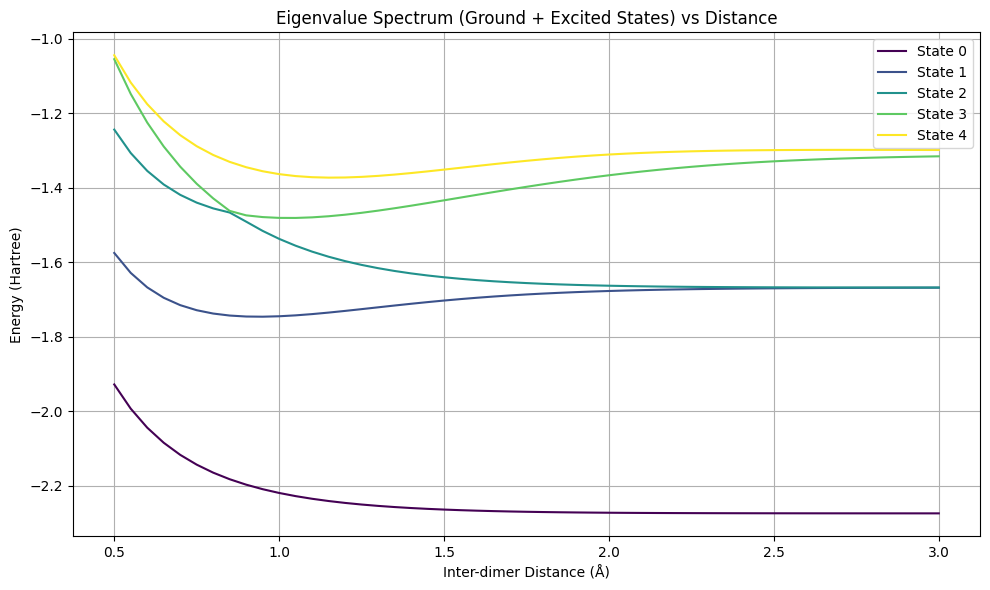

In [68]:
import numpy as np

k = 5 # Number of eigenstates to plot
distances = np.arange(0.5, 3.0 + 0.01, 0.05)[:len(eigenvalue_spectrum)]  # match length

# Build a (len(distances) x k) array
energy_levels = np.full((len(distances), k), np.nan)  # fill with NaN for missing values

for i, eigvals in enumerate(eigenvalue_spectrum):
    n = min(k, len(eigvals))
    energy_levels[i, :n] = eigvals[:n]

# Plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, k))

for i in range(k):
    plt.plot(distances, energy_levels[:, i], label=f"State {i}", color=colors[i])

plt.xlabel("Inter-dimer Distance (Å)")
plt.ylabel("Energy (Hartree)")
plt.title("Eigenvalue Spectrum (Ground + Excited States) vs Distance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [69]:
qubit_op

SparsePauliOp(['IIIIII', 'IIIIIZ', 'IIIIZZ', 'IIIIZI', 'IIIXXZ', 'IIIXXI', 'IIIYYI', 'IIIYYZ', 'IIIZZI', 'IIIZZZ', 'IIIZII', 'IIIZIZ', 'IIZIII', 'IIZIIZ', 'ZXXIII', 'ZXXIIZ', 'IYYIII', 'IYYIIZ', 'IZZIII', 'IZZIIZ', 'XXZIII', 'XXZIIZ', 'YYIIII', 'YYIIIZ', 'ZZIIII', 'ZZIIIZ', 'ZIIIII', 'ZIIIIZ', 'IIIZXX', 'IIIZYY', 'IIIIYY', 'IIIIXX', 'IIIXIX', 'IIIXZX', 'IIIYIY', 'IZXIZX', 'IIXIZX', 'IZXIIX', 'IIXIIX', 'XXXIZX', 'YXYIZX', 'XXXIIX', 'YXYIIX', 'ZXZIZX', 'IXIIZX', 'ZXZIIX', 'IXIIIX', 'XZIIZX', 'XIIIZX', 'XZIIIX', 'XIIIIX', 'IIZZXX', 'IIZIYY', 'ZXXZXX', 'IYYZXX', 'ZXXIYY', 'IYYIYY', 'IZZZXX', 'IZZIYY', 'XXZZXX', 'YYIZXX', 'XXZIYY', 'YYIIYY', 'ZZIZXX', 'ZZIIYY', 'ZIIZXX', 'ZIIIYY', 'IZXXXX', 'IIXXXX', 'IZXYXY', 'IIXYXY', 'XXXXXX', 'YXYXXX', 'XXXYXY', 'YXYYXY', 'ZXZXXX', 'IXIXXX', 'ZXZYXY', 'IXIYXY', 'XZIXXX', 'XIIXXX', 'XZIYXY', 'XIIYXY', 'IIZIZZ', 'ZXXIZZ', 'IYYIZZ', 'IZZIZZ', 'XXZIZZ', 'YYIIZZ', 'ZZIIZZ', 'ZIIIZZ', 'IZXZXZ', 'IIXZXZ', 'IZXIXI', 'IIXIXI', 'XXXZXZ', 'YXYZXZ', 'XXXIXI', 'YXYI

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor

# Storage
distances = []
eigenvalue_spectrum = []  # list of lists (each sublist is spectrum at one distance)

# Scan inter-dimer distances
for dist in np.arange(0.5, 3.0 + 0.01, 0.02):
    atom_string = f"H 0.0 0.0 0.0; H 0.0 0.0 0.74; H 0.0 {dist:.2f} 0.00; H 0.0 {dist:.2f} 0.74"
    
    # Run PySCF and extract molecule
    driver = PySCFDriver(atom=atom_string, basis="sto3g", unit=DistanceUnit.ANGSTROM)
    problem = driver.run()
    mol = driver._mol
    mf = driver._calc
    
    # Add nuclear repulsion to h1 tensor (manual step)
    hamiltonian = problem.hamiltonian
    nuclear_repulsion = problem.nuclear_repulsion_energy
    hamiltonian.electronic_integrals.alpha += PolynomialTensor({"": nuclear_repulsion})
    hamiltonian.nuclear_repulsion_energy = None

    # Jordan-Wigner mapping
    mapper = JordanWignerMapper()
    # qubit_op = mapper.map(hamiltonian.second_q_op())
    tapered_mapper = problem.get_tapered_mapper(mapper)
    qubit_op = tapered_mapper.map(hamiltonian.second_q_op())

    # Diagonalize full qubit Hamiltonian matrix
    eigvals, _ = np.linalg.eigh(qubit_op.to_matrix())
    eigvals = np.real(np.sort(eigvals))

    # Store
    distances.append(dist)
    eigenvalue_spectrum.append(eigvals)
print(f"Distances: {distances}")
print(f"Eigenvalue Spectrum: {eigenvalue_spectrum}") 

Distances: [0.5, 0.52, 0.54, 0.56, 0.5800000000000001, 0.6000000000000001, 0.6200000000000001, 0.6400000000000001, 0.6600000000000001, 0.6800000000000002, 0.7000000000000002, 0.7200000000000002, 0.7400000000000002, 0.7600000000000002, 0.7800000000000002, 0.8000000000000003, 0.8200000000000003, 0.8400000000000003, 0.8600000000000003, 0.8800000000000003, 0.9000000000000004, 0.9200000000000004, 0.9400000000000004, 0.9600000000000004, 0.9800000000000004, 1.0000000000000004, 1.0200000000000005, 1.0400000000000005, 1.0600000000000005, 1.0800000000000005, 1.1000000000000005, 1.1200000000000006, 1.1400000000000006, 1.1600000000000006, 1.1800000000000006, 1.2000000000000006, 1.2200000000000006, 1.2400000000000007, 1.2600000000000007, 1.2800000000000007, 1.3000000000000007, 1.3200000000000007, 1.3400000000000007, 1.3600000000000008, 1.3800000000000008, 1.4000000000000008, 1.4200000000000008, 1.4400000000000008, 1.4600000000000009, 1.4800000000000009, 1.5000000000000009, 1.520000000000001, 1.5400

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


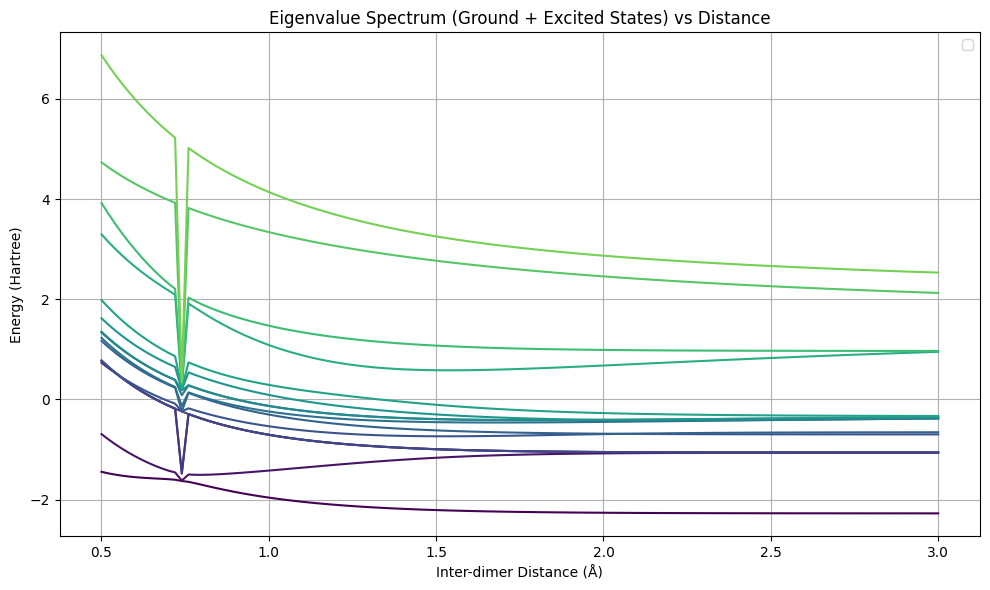

In [44]:
import numpy as np

k = 20  # Number of eigenstates to plot
distances = np.arange(0.5, 3.0 + 0.01, 0.02)[:len(eigenvalue_spectrum)]  # match length

# Build a (len(distances) x k) array
energy_levels = np.full((len(distances), k), np.nan)  # fill with NaN for missing values

for i, eigvals in enumerate(eigenvalue_spectrum):
    n = min(k, len(eigvals))
    energy_levels[i, :n] = eigvals[:n]

# Plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, k))

for i in range(k):
    plt.plot(distances, energy_levels[:, i], color=colors[i])

plt.xlabel("Inter-dimer Distance (Å)")
plt.ylabel("Energy (Hartree)")
plt.title("Eigenvalue Spectrum (Ground + Excited States) vs Distance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.operators import PolynomialTensor

# Storage
distances = []
eigenvalue_spectrum = []  # list of lists (each sublist is spectrum at one distance)

# Scan inter-dimer distances
for dist in np.arange(0.5, 3.0 + 0.01, 0.02):
    atom_string = f" H 0.0 0.0 0.0;H 0.74 0.0 0.0;H {dist:.2f}+0.74 0.0 0.0;H {dist:.2f}+1.48 0.0 0.0"
    
    # Run PySCF and extract molecule
    driver = PySCFDriver(atom=atom_string, basis="sto3g", unit=DistanceUnit.ANGSTROM)
    problem = driver.run()
    mol = driver._mol
    mf = driver._calc
    
    # Add nuclear repulsion to h1 tensor (manual step)
    hamiltonian = problem.hamiltonian
    nuclear_repulsion = problem.nuclear_repulsion_energy
    hamiltonian.electronic_integrals.alpha += PolynomialTensor({"": nuclear_repulsion})
    hamiltonian.nuclear_repulsion_energy = None

    # Jordan-Wigner mapping
    mapper = JordanWignerMapper()
    # qubit_op = mapper.map(hamiltonian.second_q_op())
    tapered_mapper = problem.get_tapered_mapper(mapper)
    qubit_op = tapered_mapper.map(hamiltonian.second_q_op())

    # Diagonalize full qubit Hamiltonian matrix
    eigvals, _ = np.linalg.eigh(qubit_op.to_matrix())
    eigvals = np.real(np.sort(eigvals))

    # Store
    distances.append(dist)
    eigenvalue_spectrum.append(eigvals)
print(f"Distances: {distances}")
print(f"Eigenvalue Spectrum: {eigenvalue_spectrum}") 

Distances: [0.5, 0.52, 0.54, 0.56, 0.5800000000000001, 0.6000000000000001, 0.6200000000000001, 0.6400000000000001, 0.6600000000000001, 0.6800000000000002, 0.7000000000000002, 0.7200000000000002, 0.7400000000000002, 0.7600000000000002, 0.7800000000000002, 0.8000000000000003, 0.8200000000000003, 0.8400000000000003, 0.8600000000000003, 0.8800000000000003, 0.9000000000000004, 0.9200000000000004, 0.9400000000000004, 0.9600000000000004, 0.9800000000000004, 1.0000000000000004, 1.0200000000000005, 1.0400000000000005, 1.0600000000000005, 1.0800000000000005, 1.1000000000000005, 1.1200000000000006, 1.1400000000000006, 1.1600000000000006, 1.1800000000000006, 1.2000000000000006, 1.2200000000000006, 1.2400000000000007, 1.2600000000000007, 1.2800000000000007, 1.3000000000000007, 1.3200000000000007, 1.3400000000000007, 1.3600000000000008, 1.3800000000000008, 1.4000000000000008, 1.4200000000000008, 1.4400000000000008, 1.4600000000000009, 1.4800000000000009, 1.5000000000000009, 1.520000000000001, 1.5400

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


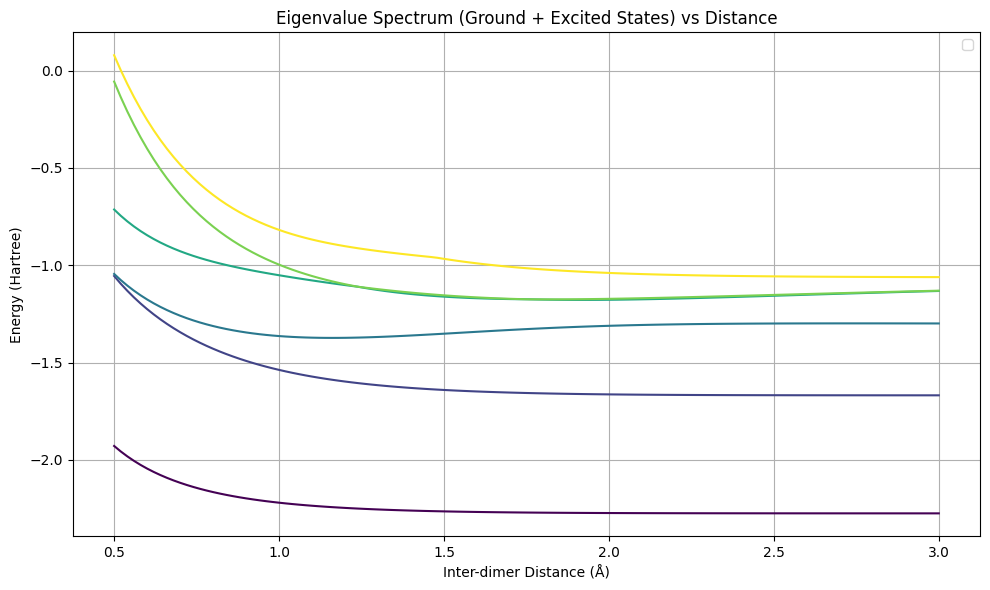

In [48]:
import numpy as np

k = 6 # Number of eigenstates to plot
distances = np.arange(0.5, 3.0 + 0.01, 0.02)[:len(eigenvalue_spectrum)]  # match length

# Build a (len(distances) x k) array
energy_levels = np.full((len(distances), k), np.nan)  # fill with NaN for missing values

for i, eigvals in enumerate(eigenvalue_spectrum):
    n = min(k, len(eigvals))
    energy_levels[i, :n] = eigvals[:n]

# Plot
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, k))

for i in range(k):
    plt.plot(distances, energy_levels[:, i], color=colors[i])

plt.xlabel("Inter-dimer Distance (Å)")
plt.ylabel("Energy (Hartree)")
plt.title("Eigenvalue Spectrum (Ground + Excited States) vs Distance")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

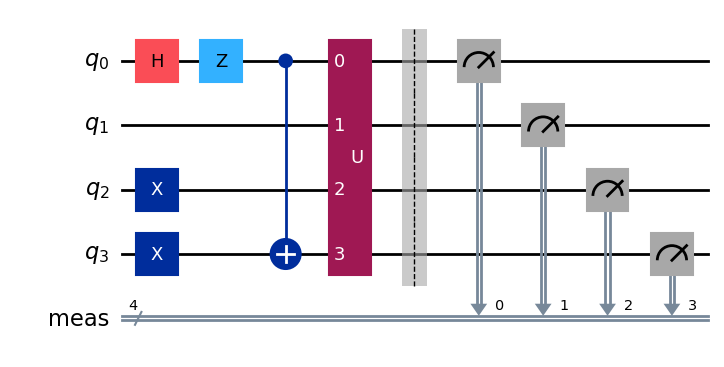

In [75]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector, Pauli
from qiskit.visualization import plot_histogram, circuit_drawer
import numpy as np

# 1. Prepare the superposition state (|0011> + |1010>)/sqrt(2)
qc = QuantumCircuit(4)

# Initialize to |0011>
qc.x(2)
qc.x(3)

# Create superposition
qc.h(0)
qc.z(0)
qc.cx(0, 3)

# 2. Apply a generic unitary (for demonstration, use a random unitary)

unitary = Operator(np.random.rand(16,16) + 1j*np.random.rand(16,16))
unitary = unitary.data
# To ensure it's unitary, use QR decomposition
q, r = np.linalg.qr(unitary)
unitary = q
qc.unitary(unitary, [0,1,2,3], label='U')

# 3. Measure in Z basis (for Hamiltonian expectation value)
# For demonstration, let's measure Z on qubit 0
qc.measure_all()

# 4. Visualize the circuit
qc.draw(output='mpl')
